In [246]:
import tensorflow as tf
import os 
import cv2
import imghdr
from matplotlib import pyplot as plt 
import numpy as np  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

In [247]:
#limits memory use and prevents OOM errors

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)



In [248]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [249]:
# removes any uncompatable images

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image not in image_exts: {image_path}') 
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with {image_path}') 

                


Found 217 files belonging to 2 classes.


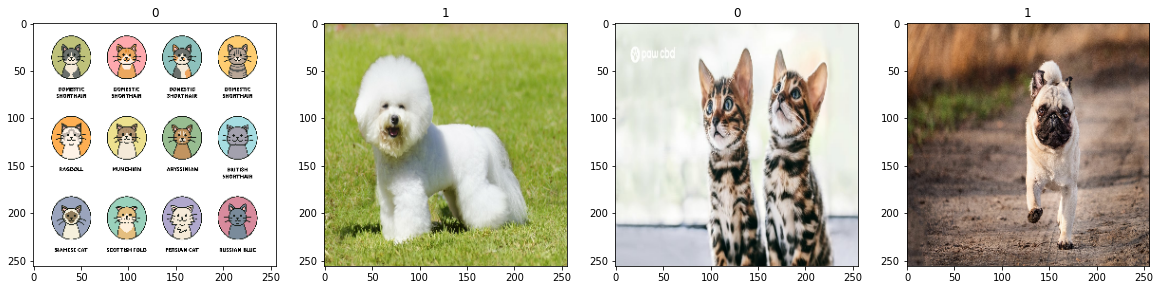

In [250]:
# load images using keras dataset (Class 1 = Dogs) (Class 0 = Cats)

data = tf.keras.utils.image_dataset_from_directory('data') 

data_iterator = data.as_numpy_iterator() #create a data iterator
batch = data_iterator.next() # get a batch from the iterator

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [251]:
# scale data into easier to compute formats

data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

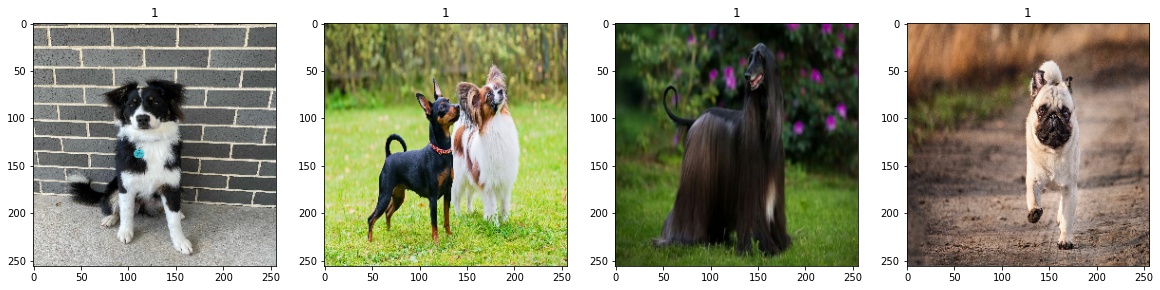

In [252]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [253]:
# split data into training and testing

train_size = int(len(data)*.7) # 7 batches in total (4 train, 2 val and 1 test)
val_size = int(len(data)*.2)+1 
test_size = int(len(data)*.1)+1

In [254]:
# allocating data batches (make sure they are shuffled)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size) 



In [255]:
# add sequential layers 

model = Sequential() 

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) # filters over data with a relu activation (negatives to 0, positives stay same)
model.add(MaxPooling2D()) 

model.add(Conv2D(32, (3,3), 1, activation='relu')) 
model.add(MaxPooling2D()) 

model.add(Conv2D(16, (3,3), 1, activation='relu')) 
model.add(MaxPooling2D()) 

model.add(Flatten())

model.add(Dense(256, activation='relu')) # fully connected layers with 256 neurons
model.add(Dense(1, activation='sigmoid')) # sigmoid takes outputs and convert to range between 0 and 1 

In [256]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy']) # uses adam optimizer to track accuracy 

In [257]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 16)      

In [258]:
# create AI callbacks for training logs

logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)



In [259]:
# begin training

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]) 

Epoch 1/20
4/4 [==============================] - 5s 955ms/step - loss: 1.3338 - accuracy: 0.5234 - val_loss: 0.7652 - val_accuracy: 0.4844
Epoch 2/20
4/4 [==============================] - 4s 895ms/step - loss: 0.7214 - accuracy: 0.4766 - val_loss: 0.6476 - val_accuracy: 0.4844
Epoch 3/20
4/4 [==============================] - 4s 905ms/step - loss: 0.6166 - accuracy: 0.5781 - val_loss: 0.5598 - val_accuracy: 0.7188
Epoch 4/20
4/4 [==============================] - 4s 901ms/step - loss: 0.6444 - accuracy: 0.6797 - val_loss: 0.5431 - val_accuracy: 0.7656
Epoch 5/20
4/4 [==============================] - 4s 912ms/step - loss: 0.5663 - accuracy: 0.7422 - val_loss: 0.5234 - val_accuracy: 0.7500
Epoch 6/20
4/4 [==============================] - 4s 876ms/step - loss: 0.5405 - accuracy: 0.7578 - val_loss: 0.5182 - val_accuracy: 0.8281
Epoch 7/20
4/4 [==============================] - 4s 896ms/step - loss: 0.4917 - accuracy: 0.7891 - val_loss: 0.4956 - val_accuracy: 0.7969
Epoch 8/20
4/4 [====

In [260]:
hist.history

{'loss': [1.3338372707366943,
  0.7213554382324219,
  0.6166253089904785,
  0.6444230079650879,
  0.5662896633148193,
  0.540511965751648,
  0.491682767868042,
  0.5160750150680542,
  0.42694252729415894,
  0.42860034108161926,
  0.31608885526657104,
  0.43652474880218506,
  0.3579208552837372,
  0.31016048789024353,
  0.27899283170700073,
  0.28095173835754395,
  0.20705300569534302,
  0.1970660239458084,
  0.18392056226730347,
  0.1712135523557663],
 'accuracy': [0.5234375,
  0.4765625,
  0.578125,
  0.6796875,
  0.7421875,
  0.7578125,
  0.7890625,
  0.765625,
  0.84375,
  0.8046875,
  0.8671875,
  0.8203125,
  0.890625,
  0.890625,
  0.8984375,
  0.921875,
  0.9296875,
  0.9453125,
  0.921875,
  0.9609375],
 'val_loss': [0.7652012705802917,
  0.647556483745575,
  0.559760570526123,
  0.5430511236190796,
  0.523422360420227,
  0.5181757807731628,
  0.4955994188785553,
  0.42235124111175537,
  0.4574316442012787,
  0.2719975709915161,
  0.3534544110298157,
  0.4901900589466095,
  0.3

Text(0.5, 1.0, 'Accuracy over Iterations')

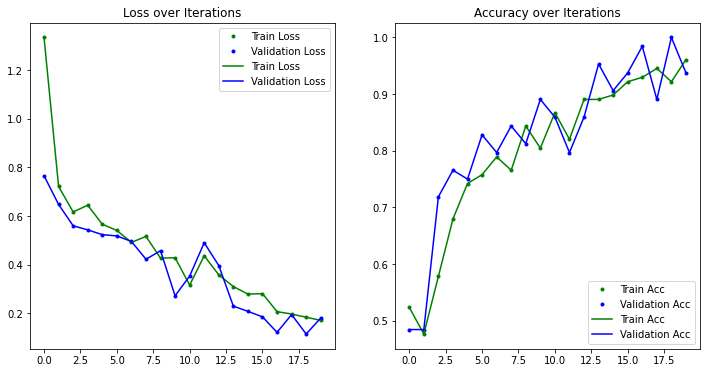

In [261]:
n = len(hist.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (hist.history["loss"]),'g.', label="Train Loss")
ax.plot(range(n), (hist.history["val_loss"]),'b.', label="Validation Loss")
ax.plot(range(n), (hist.history["loss"]),'green', label="Train Loss")
ax.plot(range(n), (hist.history["val_loss"]),'blue', label="Validation Loss")
ax.legend()
ax.set_title('Loss over Iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (hist.history["accuracy"]),'g.', label="Train Acc")
ax.plot(range(n), (hist.history["val_accuracy"]),'b.', label="Validation Acc")
ax.plot(range(n), (hist.history["accuracy"]),'green', label="Train Acc")
ax.plot(range(n), (hist.history["val_accuracy"]),'blue', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title(f'Accuracy over Iterations') 

In [262]:
# evalute the data of newly trained AI

pre = Precision()
re = Recall()
acc = BinaryAccuracy() 

for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    acc.update_state(y, yhat)
    re.update_state(y, yhat)

print(f'Precision:{format(pre.result().numpy(), ".2f")}, Recall:{format(re.result().numpy(), ".2f")}, Accuracy:{format(acc.result().numpy(), ".2f")}') 



1/1 [==============================] - 0s 120ms/step
Precision:1.00, Recall:1.00, Accuracy:1.00


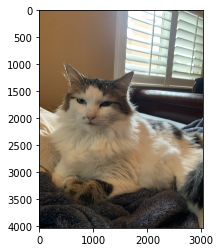

In [263]:
# evaluating the accuracy of outside images

select = input("Choose Image to Analyze: ")
img = cv2.imread(f'{select}')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [264]:
resize = tf.image.resize(img, (256,256))


yhat = model.predict(np.expand_dims(resize/255, 0)) 
if yhat > .5: #Cat = 0, Dog = 1 
    print("This is a dog.")
else:
    print("This is a cat.") 

yhat

1/1 [==============================] - 0s 17ms/step
This is a cat.


array([[0.11042748]], dtype=float32)

In [265]:
# save the model data for future use

model.save(os.path.join('models', 'catdogrecognition.h5')) 


In [266]:
# load back pre-existing models

new_model = load_model(os.path.join('models', 'catdogrecognition.h5')) 

 

